In [1]:
# Moduł do przetwarzania wszystkich obrazów w folderze
import os
import streamlit_test2 as STtest2
import shutil
import ocr
import detect_car as detect

def process_all_images_in_folder(folder_path):
    # Pobierz listę wszystkich plików w folderze
    filenames = os.listdir(folder_path)

    # Ustal ścieżki do folderów docelowych plików odrzuconych
    unreadable_folder = '../RentML/dataset/training/unreadable'
    multi_read_folder = '../RentML/dataset/training/multi_read'
    os.makedirs(unreadable_folder, exist_ok=True)
    os.makedirs(multi_read_folder, exist_ok=True)

    
    # Iteruj przez wszystkie pliki
    for i, filename in enumerate(filenames, start=1):
        # Tworzymy pełną ścieżkę do pliku
        full_path = os.path.join(folder_path, filename)
        
        # Sprawdzamy, czy plik jest obrazem
        if full_path.lower().endswith(('.png', '.jpg', '.jpeg')):
            # Otwórz obraz
            with open(full_path, 'rb') as f:
                img_cv = STtest2.load_image(f)

            # Przetwarzaj obraz
            #preprocessed_img, mileage = STtest2.process_image(img_cv)
                
            # Wykonaj OCR
            mileage = ocr.mileage_ocr(img_cv)
            
            # Zidentyfikuj samochód
            car_type = detect.identify(full_path)

            # Jeśli mileage jest None, przenieś plik do folderu unreadable
            if mileage is None:
                shutil.move(full_path, os.path.join(unreadable_folder, filename))
                continue

            # Jeśli mileage ma więcej niż jedną wartość, przenieś plik do folderu multi_read
            if isinstance(mileage, list) and len(mileage) > 1:
                shutil.move(full_path, os.path.join(multi_read_folder, filename))
                continue

            # Ekstrakcja i dodanie danych
            STtest2.extract_and_append_data(full_path, mileage, car_type)

            # Wyświetlanie danych
            STtest2.load_and_display_data(full_path)

            # Potwierdzenie wykonania pętli
            print(f'Eroded image: {filename}, {i}/{len(filenames)}')

# Wywołanie funkcji na folderze ze zdjęciami
# Set divided into two folders
process_all_images_in_folder('../RentML/dataset/training/Osobowy')
process_all_images_in_folder('../RentML/dataset/training/Dostawczy')

2024-02-03 17:38:34.478 
  command:

    streamlit run C:\Users\Dragon\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]


Eroded image: 20210824_105026.jpg, 1/36
Eroded image: 20211029_175536.jpg, 2/36
Eroded image: 20211230_185110.jpg, 3/36
Eroded image: 20220130_174758.jpg, 4/36
Eroded image: 20220201_084013.jpg, 5/36
Eroded image: 20220624_175204.jpg, 6/36
Eroded image: 20220719_190548.jpg, 7/36
Eroded image: 20220725_221323.jpg, 8/36
Eroded image: 20220731_205750.jpg, 9/36
Eroded image: 20220820_184423.jpg, 10/36
Eroded image: 20220905_111137.jpg, 11/36
Eroded image: 20220927_163414.jpg, 12/36
Eroded image: 20221025_172929.jpg, 13/36
Eroded image: 20221111_221845.jpg, 14/36
Eroded image: 20221113_123117.jpg, 15/36
Eroded image: 20221124_085205.jpg, 16/36
Eroded image: 20221128_194118.jpg, 17/36
Eroded image: 20230225_114622.jpg, 18/36
Eroded image: 20230303_091305.jpg, 19/36
Eroded image: 20230406_170928.jpg, 20/36
Eroded image: 20230412_121813.jpg, 21/36
Eroded image: 20230418_165728.jpg, 22/36
Eroded image: 20230501_120055.jpg, 23/36
Eroded image: 20230519_165754.jpg, 24/36
Eroded image: 20230616_20

In [5]:
# Wczytaj dane z pliku mileage.json do DataFrame
import pandas as pd
import json

try:
    with open('mileage.json', 'r') as f:
        data = json.load(f)
        if data:
            df = pd.DataFrame(data)
            column_values = df.iloc[:, 3].tolist()
            for value in column_values:
            #for value in df:
                print(value)
        else:
            print("The 'mileage.json' file is empty.")
except FileNotFoundError:
    print("The 'mileage.json' file does not exist.")
except json.JSONDecodeError:
    print("Error decoding JSON file.")


[250284]
[254410]
[256163]
[257050]


# WIPE JSON FILE - CAREFUL

In [ ]:
# Wipe mileage.json file
with open('mileage.json', 'w') as f:
    pass

## EDGE DETECTION TEST

In [ ]:
# 1. Load the image as img
import cv2
import numpy as np
import matplotlib.pyplot as plt
import ocr as ocr
import importfile as imp
# Import the image
file = imp.browse_files()
# Load the image
img = cv2.imread(file)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

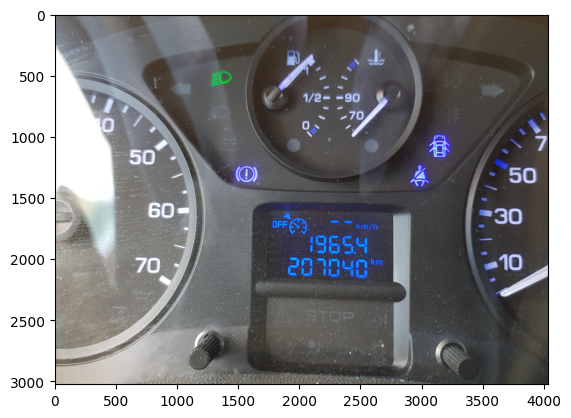

In [ ]:
# Show image
plt.imshow(cv2.imread(file), cmap='gray')

OCR result:
['125590', '178100']
OCR result after edge detection:
Original image:


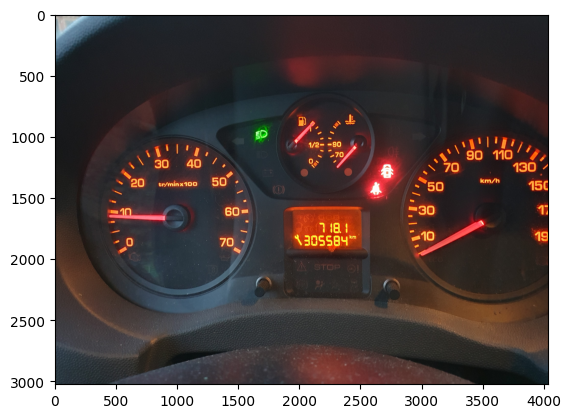

Sharpened image:


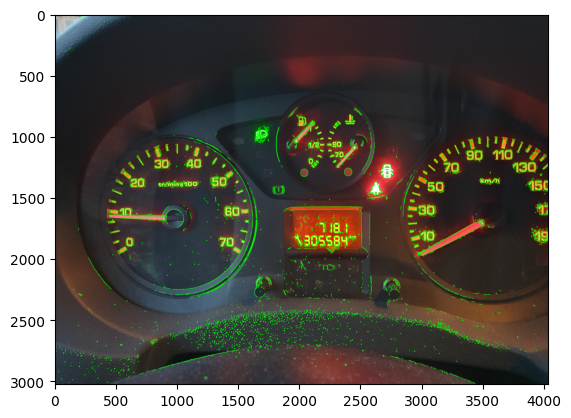

['003400']


In [ ]:
# 2. ORDER: 1. GAMMA CORRECTION, 2. EROSION, 3. EDGE DETECTION 4. SHARPENING
def unsharp_mask(image, sigma=16.0, strength=4.5):
    # Rozmycie Gaussowskie obrazu
    blurred = cv2.GaussianBlur(image, (1, 1), sigma)
    # Wzmacniamy obraz poprzez dodanie ważonej różnicy między oryginalnym obrazem a rozmytym
    sharpened = cv2.addWeighted(image, 1.0 + strength, blurred, -strength, 0) 
    return sharpened
def adjust_gamma(image, gamma=1.2):
    # Budujemy tablicę do mapowania każdej skali szarości na jej odpowiednik po korekcji gamma
    invGamma = 5 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")

    # Zastosuj mapowanie gamma do obrazu wejściowego
    return cv2.LUT(image, table)
def edge_detection(image):
    # Apply Gaussian blur to reduce noise
    img_blur = cv2.GaussianBlur(img, (29, 29), 1)

    # Apply Canny edge detection
    edges = cv2.Canny(img_blur, 50, 90)

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on the original image
    img_with_contours = cv2.drawContours(img.copy(), contours, -3, (0,255,0), 2)

    # Display the image with contours using matplotlib
    #plt.imshow(img_with_contours, cmap='gray')
    #plt.show()
    return img_with_contours
def preprocess(img):
    """
    Preprocesses an image for further analysis.

    The function reads an image from the file path provided, checks if the image is loaded properly, and resizes the image to a maximum dimension of 1080 pixels, maintaining the aspect ratio.

    Args:
        file (str): The file path to the image to be preprocessed.

    Returns:
        numpy.ndarray or None: The preprocessed image as a numpy array if the image is loaded properly, or None if the image cannot be read.
    """
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gamma_corrected_img = adjust_gamma(img, gamma=1.2)  # Możesz dostosować wartość gamma w zależności od Twojego obrazu
    kernel = np.ones((3,3),np.uint8)
    eroded_img = cv2.erode(gamma_corrected_img, kernel, iterations=4)
    edge_img = edge_detection(eroded_img)
    sharpened_img = unsharp_mask(edge_img)
    
    print("Original image:")
    plt.imshow(img, cmap='gray')
    plt.show()
    #print("Gamma corrected image:")
    #plt.imshow(gamma_corrected_img, cmap='gray')
    #plt.show()
    #print("Eroded image:")
    #plt.imshow(eroded_img, cmap='gray')
    #plt.show()
    #print("Edge detected image:")
    #plt.imshow(edge_img, cmap='gray')
    #plt.show()
    print("Sharpened image:")
    plt.imshow(sharpened_img, cmap='gray')
    plt.show()
    
    return sharpened_img
print("OCR result:")
print(ocr.mileage_ocr(cv2.imread(file)))
#preprocess(cv2.imread(file))
print("OCR result after edge detection:")
print(ocr.mileage_ocr(preprocess(cv2.imread(file))))